# Exercices : Les bases de Python

### Exercice 1 : Quelle est la valeur de a, b et c ?

In [5]:
a, b, c = 5, 10, 15

a = b + c       
b = a - c        
c = b * 2        
a, b = b, a + c 
c = a - b + c    

#### Correction Exercice 1

In [ ]:
print(f"La valeur de a est :", a) # on checke la dernière affectation: a = b -> a - c -> a (b + c = 25) - c (15) = 10
print(f"La valeur de b est :", b) 
print(f"La valeur de c est :", c)

La valeur de a est : 10
La valeur de b est : 45
La valeur de c est : -15


### Exercice 2 : Calcul d'une somme

Écris de deux manières différentes un programme Python qui :


$$
S = 1 + \frac{1}{1.1} + \frac{1}{1.2} + \frac{1}{1.3} + \cdots + \frac{1}{5.0}
$$


#### Correction Exercice 2

In [ ]:
somme = 1
x = 1.1
# compteur = 1

while x <= 5.0:
    somme += 1 / x
    # compteur += 1
    x += 0.1

print("Somme (while) :", somme) # round(somme, 4)
# print("Nombre de termes :", compteur)

Somme (while) : 16.702370843611703


In [ ]:
somme = 1
# compteur = 1

for i in range(11, 51):  # de 1.1 à 5.0 inclus
    x = i / 10
    somme += 1 / x
    # compteur += 1

print("Somme (for) :", round(somme, 4))
# print("Nombre de termes :", compteur)


# Avec np.arange
# import numpy as np

# somme = 1
# for x in np.arange(1.1, 5.1, 0.1):
#     somme += 1 / x

# print("Somme (for) avec np.arange :", round(somme, 4))




# Plus technique
somme = 1 + sum([1 / (i / 10) for i in range(11, 51)])
# print("Somme (for) plus technique :", round(somme, 4))

Somme (for) : 16.7024
Somme (for) : 16.7024


### Exercice 3 : Calcul du discriminant

Écrire un programme qui demande trois nombres réels $a$, $b$, $c$ avec $a \ne 0$ puis résout l’équation 

$(E):\quad ax^2 + bx + c = 0$

d’inconnue $x \in \mathbb{R}$, de la manière suivante :

- Si $a = 0$, le programme signale une erreur et s’arrête.
-  Si $a \ne 0$, le programme calcule $\Delta = b^2 - 4ac$ et affiche, selon les cas :
   
    - pas de solution réelle si $\Delta < 0$,
    - une seule solution réelle si $\Delta = 0$,
    - deux solutions réelles distinctes si $\Delta > 0$.



In [ ]:
import math

###  Pas de solution réelle : a = 2, b = 1, c = 3
###  Une seule solution réelle : a = 1, b = 6, c = 9
###  Deux solutions réelles distinctes : a = 1, b = -3, c = -4

a = 2
b = 1
c = 3

if a == 0:
    print("Erreur : a ne doit pas être nul.")
else:
    delta = b**2 - 4 * a * c
    if delta < 0:
        print("Pas de solution réelle.")
    elif delta == 0:
        x = -b / (2 * a)
        print("Une seule solution réelle : x =", x)
    else:
        x1 = (-b - math.sqrt(delta)) / (2 * a)
        x2 = (-b + math.sqrt(delta)) / (2 * a)
        print("Deux solutions réelles : x1 =", x1, ", x2 =", x2)

Deux solutions réelles : x1 = -1.0 , x2 = 4.0


### Exercice 4 : 

On définit la suite $(u_n)_n$ par $u_0 = 1$, $u_1 = \frac{1}{2}$, et la relation :

$$
\forall k \in \mathbb{N}^*, \quad u_{k+1} = u_k(1 + u_k - u_{k-1})
$$

---

**a)** Écrire un programme qui lit un entier $n$, calcule $u_k$ pour $2 \leq k \leq n$, et affiche $u_n$.

**b)** On peut montrer que :

* La suite $(u_n)$ est décroissante et converge vers un réel $\ell \in [0,1]$,
* Pour $k \geq 2$, on a :

  $$
  0 \leq u_k - \ell \leq 2(u_k - u_{k-1})
  $$

Écrire un programme qui lit un réel $\varepsilon > 0$, calcule $u_k$ jusqu'à ce que
$|u_{k+1} - u_k| < \varepsilon$, puis affiche le dernier $u_k$.

> Le nombre affiché est une approximation de $\ell$ à $2\varepsilon$ près.

#### Correction a)

In [20]:
# Entrez un entier n ≥ 2
n = 5

u_k_minus_1 = 1       # u_0
u_k = 0.5             # u_1

if n == 0:
    print("u_0 =", u_k_minus_1)
elif n == 1:
    print("u_1 =", u_k)
else:
    for k in range(2, n + 1):
        u_k_plus_1 = u_k * (1 + u_k - u_k_minus_1)
        u_k_minus_1, u_k = u_k, u_k_plus_1
    print(f"u_{n} = {u_k}")
    

u_5 = 0.1737213134765625


#### Correction b)

In [ ]:
import matplotlib.pyplot as plt

# Paramètres d'initialisation
epsilon = 1e-5
u_k_minus_1 = 1     # u₀
u_k = 0.5           # u₁
k = 1

# Stockage pour affichage
indices = [0, 1]
values = [u_k_minus_1, u_k]

# Premier calcul
u_k_plus_1 = u_k * (1 + u_k - u_k_minus_1)

# Itération jusqu'à convergence
while abs(u_k_plus_1 - u_k) >= epsilon:
    u_k_minus_1, u_k = u_k, u_k_plus_1
    k += 1
    indices.append(k)
    values.append(u_k)
    u_k_plus_1 = u_k * (1 + u_k - u_k_minus_1)

plt.figure(figsize=(10, 5))
plt.plot(indices, values, marker='o')
plt.title("Approximation de la limite de la suite $u_k$")
plt.xlabel("k")
plt.ylabel("$u_k$")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Entrez un réel ε > 0
epsilon = 1e-2

u_k_minus_1 = 1     # u₀
u_k = 0.5           # u₁
k = 1

u_k_plus_1 = u_k * (1 + u_k - u_k_minus_1)

while abs(u_k_plus_1 - u_k) >= epsilon:
    u_k_minus_1, u_k = u_k, u_k_plus_1
    k += 1
    u_k_plus_1 = u_k * (1 + u_k - u_k_minus_1)

print(f"Approximation de ℓ : u_{k} = {u_k}")

Approximation de ℓ : u_4 = 0.17578125


### Exercice 6 : algorithme de dichotomie

Soient deux réels $a < b$ et une application continue $f : [a, b] \to \mathbb{R}$ telle que
$f(a)f(b) < 0$.

On définit les suites $(a_n)_{n \in \mathbb{N}}$ et $(b_n)_{n \in \mathbb{N}}$ par les relations suivantes :

$$
\begin{cases}
a_0 = a,\quad b_0 = b \\\\
\text{si } a_n \text{ et } b_n \text{ sont définis, on pose } c_n = \dfrac{a_n + b_n}{2},\quad p_n = f(a_n)f(c_n) \\\\
\text{si } p_n < 0,\quad a_{n+1} = a_n,\quad b_{n+1} = c_n \\\\
\text{si } p_n > 0,\quad a_{n+1} = c_n,\quad b_{n+1} = b_n \\\\
\text{si } p_n = 0,\quad a_{n+1} = b_{n+1} = c_n
\end{cases}
$$

Les suites $(a_n)$ et $(b_n)$ convergent vers un nombre $c \in [a, b]$ tel que $a_n \leq c \leq b_n$ pour tout $n$, et $f(c) = 0$.


a) Dans cette question, on prend la fonction $f(x) = x^2 - 2$.

Écrire un programme qui :

* Affecte à $a$ le nombre 0, à $b$ le nombre 2
* Calcule les termes successifs des suites $(a_n)$ et $(b_n)$ jusqu’à ce que
  $b_n - a_n < 10^{-8}$
* Affiche une approximation de $\sqrt{2}$ à $10^{-8}$ près


b) Modifier le programme pour qu’il fournisse une approximation à $10^{-6}$ près de l’unique réel $x > 0$ tel que :

$$
e^x + x = 2
$$



In [ ]:
%matplotlib qt

import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Fonction cible : f(x) = x^2 - 2
def f(x):
    return x**2 - 2

# Valeurs initiales
a, b = 0, 2
epsilon = 1e-8

# Préparer toutes les étapes de dichotomie
def compute_steps(f, a, b, epsilon):
    an, bn = a, b
    history = []
    while abs(bn - an) >= epsilon:
        cn = (an + bn) / 2
        pn = f(an) * f(cn)
        history.append((an, cn, bn))
        if pn < 0:
            bn = cn
        elif pn > 0:
            an = cn
        else:
            break
    return history

steps = compute_steps(f, a, b, epsilon)
current_step = [0]  # index mutable

# Création de la figure
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

line_an, = ax.plot([], [], 'ro', label='aₙ')
line_cn, = ax.plot([], [], 'go', label='cₙ')
line_bn, = ax.plot([], [], 'bo', label='bₙ')
interval_line, = ax.plot([], [], 'k--', alpha=0.5)

# Tracer la fonction
x_vals = [i / 100 for i in range(int(a*100), int(b*100)+1)]
y_vals = [f(x) for x in x_vals]
ax.plot(x_vals, y_vals, label='f(x)')

ax.set_title("Évolution de la méthode de dichotomie")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.legend()

# Fonction appelée à chaque clic sur le bouton
def next_step(event):
    if current_step[0] < len(steps):
        an, cn, bn = steps[current_step[0]]
        line_an.set_data([an], [f(an)])
        line_cn.set_data([cn], [f(cn)])
        line_bn.set_data([bn], [f(bn)])
        interval_line.set_data([an, bn], [0, 0])
        fig.canvas.draw()
        current_step[0] += 1

# Bouton
ax_button = plt.axes([0.4, 0.05, 0.2, 0.075])
btn = Button(ax_button, 'Étape suivante')
btn.on_clicked(next_step)

plt.show()


#### Correction a)

In [31]:
def f1(x):
    return x**2 - 2

def dichotomie(f, a, b, epsilon):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) et f(b) doivent être de signes opposés.")
    
    while b - a >= epsilon:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        elif f(a) * f(c) > 0:
            a = c
        else:
            return c  # Racine exacte trouvée
    return (a + b) / 2

# Appel pour √2
result_a = dichotomie(f1, a=0, b=2, epsilon=1e-8)
print("Approximation de √2 :", result_a)

Approximation de √2 : 1.414213564246893


#### Correction b)

In [ ]:
import math

def f2(x):
    return math.exp(x) + x - 2

result_b = dichotomie(f2, a=0, b=1, epsilon=1e-6)
print("Approximation de la solution de e^x + x = 2 :", result_b)

Approximation de la solution de e^x + x = 2 : 0.4428544044494629


### Exercice 7

Écrire un programme qui simule des lancers successifs d’un dé équilibré à 20 faces, numérotées de 1 à 20 (icosaèdre régulier), jusqu’à obtenir **une face déjà sortie**, puis affiche le **nombre de lancers effectués**.

#### 🔍 Indications

* Définir le vecteur-ligne $R = [0, 0, \dots, 0]$ de longueur 20
  (on utilisera une **liste** ou un **array** de type `numpy`).

* Pour simuler chaque lancer de dé, on pourra utiliser la fonction (lien utile: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) :

```python
numpy.random.randint
```

* À chaque lancer :

  * si la face numéro $j$ sort, ajouter 1 à $R[j]$
  * arrêter dès qu’une des composantes du vecteur $R$ atteint la valeur 2


#### Correction

In [98]:
import numpy as np

# Initialisation du vecteur R (20 faces)
R = np.zeros(20, dtype=int)

lancers = 0

while True:
    face = np.random.randint(0, 20)  # Valeur entre 0 et 19
    print("La valeur du lancer actuel :", face + 1)
    R[face] += 1
    lancers += 1

    if R[face] == 2:
        break

print("Nombre de lancers effectués avant répétition :", lancers)

La valeur du lancer actuel : 9
La valeur du lancer actuel : 9
Nombre de lancers effectués avant répétition : 2


### Exercice 8

Dans cet exercice, on importe la bibliothèque `numpy` avec le préfixe `np`,
les vecteurs ligne sont des `array`, et on **n’utilisera pas** les fonctions pré-définies `np.min` et `np.max`.

a) Écrire une fonction `MAX` prenant en argument un **vecteur ligne** et qui renvoie le **maximum** de ce vecteur (sans utiliser `np.max`).

b) Écrire une fonction `MIN` prenant en argument un **vecteur ligne** et qui renvoie le **minimum** de ce vecteur (sans utiliser `np.min`).

c) Écrire un programme qui :

* Demande deux entiers $n$ et $p$ **strictement positifs**
* Choisit au hasard dans $[0, 20]$ les coefficients d’une **matrice** $A$ de $n$ lignes et $p$ colonnes
* Détermine pour chaque $i \in [1, n]$ le **maximum** $M_i$ des coefficients de la $i$-ème ligne de $A$, puis :

  * Calcule et affiche $a = \min(M_1, M_2, \ldots, M_n)$
* Détermine pour chaque $j \in [1, p]$ le **minimum** $m_j$ des coefficients de la $j$-ème colonne de $A$, puis :

  * Calcule et affiche $b = \max(m_1, m_2, \ldots, m_p)$


Testez plusieurs fois le programme. Vous constaterez qu’on a toujours (on peut le prouver) :

$$b \leq a$$



#### Correction a)

In [101]:
import numpy as np

def MAX(vec):
    m = vec[0]
    for x in vec[1:]:
        if x > m:
            m = x
    return m

#### Correction b)

In [102]:
def MIN(vec):
    m = vec[0]
    for x in vec[1:]:
        if x < m:
            m = x
    return m


#### Correction c)

In [103]:
def main(n, p):
    
    # Créer une matrice A aléatoire de taille (n, p) avec valeurs entre 0 et 20
    A = np.random.randint(0, 21, size=(n, p))
    print("\nMatrice A :\n", A)

    # Calcul de a = min des max de chaque ligne
    max_lignes = [MAX(A[i, :]) for i in range(n)]
    a = MIN(max_lignes)

    # Calcul de b = max des min de chaque colonne
    min_colonnes = [MIN(A[:, j]) for j in range(p)]
    b = MAX(min_colonnes)

    print("\nMaximum de chaque ligne :", max_lignes)
    print("a = min(max lignes) =", a)
    print("\nMinimum de chaque colonne :", min_colonnes)
    print("b = max(min colonnes) =", b)
    print(f"\nOn a bien b = {b} ≤ a = {a}")
 
n = 3
p = 3   
main(n, p)


Matrice A :
 [[10  0 14]
 [16  8 17]
 [18 16 15]]

Maximum de chaque ligne : [14, 17, 18]
a = min(max lignes) = 14

Minimum de chaque colonne : [10, 0, 14]
b = max(min colonnes) = 14

On a bien b = 14 ≤ a = 14


### Exercice 9

Écrire une suite d’instructions qui trace sur la même figure :

* l’axe $Ox$,
* et les représentations graphiques (restreintes à l’intervalle $[0, 2\pi]$) des fonctions :

$$
f : x \mapsto \sin(x)
$$

$$
P_1 : x \mapsto x
$$

$$
P_2 : x \mapsto x - \frac{x^3}{6}
$$

$$
P_3 : x \mapsto x - \frac{x^3}{6} + \frac{x^5}{120}
$$

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
C:\Users\awben\AppData\Local\Temp\ipykernel_11404\2041207686.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Approximation de $\sin(x)$ par des polynômes de Taylor")


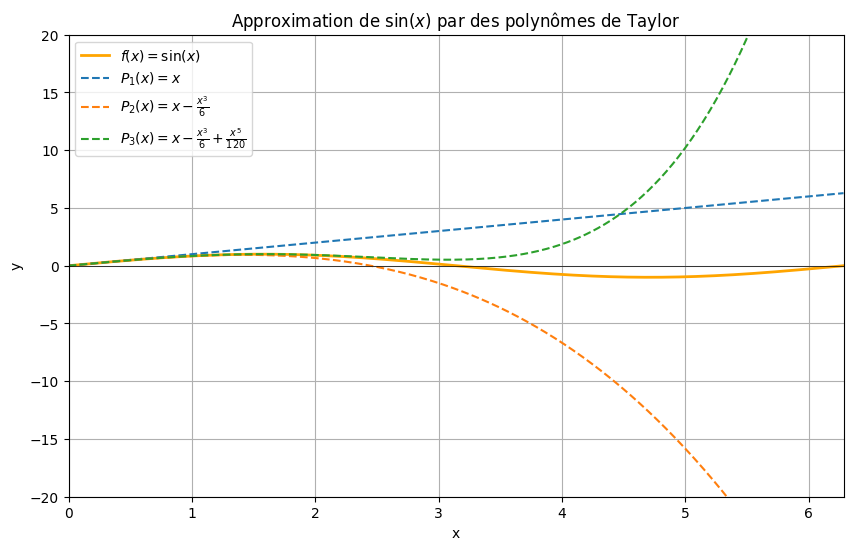

In [109]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Domaine : de 0 à 2π
x = np.linspace(0, 2 * np.pi, 500)

# Fonctions
f = np.sin(x)
P1 = x
P2 = x - x**3 / 6
P3 = x - x**3 / 6 + x**5 / 120

# Tracé
plt.figure(figsize=(10, 6))

# Tracer sin(x)
plt.plot(x, f, label=r"$f(x) = \sin(x)$", color='orange', linewidth=2)

plt.plot(x, P1, label=r"$P_1(x) = x$", linestyle='--')
plt.plot(x, P2, label=r"$P_2(x) = x - \frac{x^3}{6}$", linestyle='--')
plt.plot(x, P3, label=r"$P_3(x) = x - \frac{x^3}{6} + \frac{x^5}{120}$", linestyle='--')

plt.axhline(0, color='black', linewidth=0.5)
plt.title("Approximation de $\sin(x)$ par des polynômes de Taylor")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.xlim(0, 2 * np.pi)
plt.ylim(-20, 20)

plt.show()


### Exercice 10 : Trace d'une matrice


La **trace** d’une **matrice carrée** est la **somme de ses coefficients diagonaux**.

Créer une fonction Python `trace` qui prend en **variable d’entrée** une matrice $A$,
et renvoie en **variable de sortie** sa trace :

$$
\text{Tr}(A) = \sum_{i=1}^{n} a_{ii}
$$


In [110]:
import numpy as np

def trace(A):
    """
    Calcule la trace d'une matrice carrée A.
    La trace est la somme des éléments sur la diagonale principale.
    """
    n, p = A.shape
    if n != p:
        raise ValueError("La matrice doit être carrée.")
    
    total = 0
    for i in range(n):
        total += A[i, i]
    return total

# Exemple d'utilisation
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print("Trace de A :", trace(A))  # Doit afficher 1 + 5 + 9 = 15

Trace de A : 15


### Exercice 11 : Puissance d'une matrice

Créer une fonction Python `matrix_power_bis` qui prend en variable d’entrée :

* une **matrice carrée** $A$,
* un **entier positif** $q$

et qui renvoie $A^q$
(**sans utiliser** la fonction `matrix_power` de `numpy.linalg`).

In [ ]:
import numpy as np

def matrix_power_bis(A, q):
    """
    Renvoie la matrice A puissance q, sans utiliser numpy.linalg.matrix_power.
    A doit être une matrice carrée.
    """
    n, p = A.shape
    if n != p:
        raise ValueError("La matrice A doit être carrée.")
    if q < 0:
        raise ValueError("L'exposant q doit être positif.")

    # Cas particulier : A^0 = I
    if q == 0:
        return np.identity(n, dtype=A.dtype)

    # Initialisation : A^1 = A
    result = A.copy()
    for _ in range(1, q):
        result = np.dot(result, A)
    return result

# Exemple d'utilisation
# A = np.array([
#     [2, 1],
#     [1, 3]
# ])

A = np.array([
    [1, 0],
    [0, 1]
])

q = 3
print(f"A^{q} =\n", matrix_power_bis(A, q))

A^0 =
 [[1 0]
 [0 1]]


### Exercice 12 

Créer **deux façons** une **liste contenant les diviseurs de** $100$ :

* d’abord **avec une boucle** `for`,
* puis **en compréhension de liste**.


In [118]:
diviseurs = []
for i in range(1, 101):
    if 100 % i == 0:
        diviseurs.append(i)

print("Diviseurs de 100 (boucle) :", diviseurs)



Diviseurs de 100 (boucle) : [1, 2, 4, 5, 10, 20, 25, 50, 100]


In [119]:
diviseurs = [i for i in range(1, 101) if 100 % i == 0]
print("Diviseurs de 100 (compréhension) :", diviseurs)


Diviseurs de 100 (compréhension) : [1, 2, 4, 5, 10, 20, 25, 50, 100]


### Exercice 13

Définir une fonction `retourne` prenant en argument une **liste** et qui **modifie la liste sur place**
en **inversant l’ordre des éléments**.

Autrement dit, si l’entrée est la liste $L = [x_0, x_1, \dots, x_n]$,
après appel à `retourne(L)`, la liste devient :

$$
L = [x_n, \dots, x_1, x_0]
$$


In [121]:
def retourne(L):
    """
    Inverse l'ordre des éléments de la liste L (modification en place).
    """
    n = len(L)
    for i in range(n // 2):
        L[i], L[n - 1 - i] = L[n - 1 - i], L[i]
        
ma_liste = [1, 2, 3, 4, 5]
retourne(ma_liste)
print(ma_liste) 

[5, 4, 3, 2, 1]


In [ ]:
# Meilleure technique
def retourne(L):
    L[:] = L[::-1] # L[:] : Cela modifie la liste originale (et pas une copie)
    
ma_liste = [1, 2, 3, 4, 5]
retourne(ma_liste)
print(ma_liste) 

[5, 4, 3, 2, 1]


### Exercice 14 : Recherche des 2 plus grands éléments d’une liste

Appliquer une fonction de recherche des **deux plus grands éléments** d’une liste, avec la liste suivante :

$$
L = [6,\ 12,\ 25,\ 8,\ 18,\ 3]
$$

On donnera, **à chaque étape de la boucle**, les valeurs de :

* $e$ : l’élément courant de la liste
* $m_1$ : le plus grand élément trouvé jusqu’à présent
* $m_2$ : le deuxième plus grand élément trouvé jusqu’à présent


Trouver à la main les **deux plus grands éléments** de la liste (dans l’ordre décroissant),
en parcourant la liste de gauche à droite, comme le ferait un algorithme.


In [ ]:
def deux_max(L):
    # Initialisation avec les deux premiers éléments triés
    if L[0] >= L[1]:
        m1, m2 = L[0], L[1]
    else:
        m1, m2 = L[1], L[0]

    print(f"{'e':>4} {'m1':>6} {'m2':>6}")
    print("-" * 18)
    
    # Afficher les deux premiers éléments déjà vus
    print(f"{L[0]:>4} {m1:>6} {m2:>6}")
    print(f"{L[1]:>4} {m1:>6} {m2:>6}")

    # Parcours à partir du 3e élément
    for e in L[2:]:
        if e > m1:
            m2 = m1
            m1 = e
        elif e > m2:
            m2 = e
        print(f"{e:>4} {m1:>6} {m2:>6}")
    
    return m1, m2

L = [6, 12, 25, 8, 18, 3]
max1, max2 = deux_max(L)

print(f"\nLes deux plus grands éléments sont : {max1} et {max2}")


   e     m1     m2
------------------
   6     12      6
  12     12      6
  25     25     12
   8     25     12
  18     25     18
   3     25     18

Les deux plus grands éléments sont : 25 et 18


### Exercice 15 : Recherche des deux valeurs les plus proches d'une liste

Appliquer **à la main** la fonction précédente de **recherche des deux valeurs les plus proches** dans la liste :

$$
L = [4,\ 0,\ 10,\ 12,\ 3]
$$

On pourra faire un **tableau**, donnant pour chaque **couple d’indices** $(i, j)$ avec $i < j$, les valeurs suivantes :

* $d = |L[i] - L[j]|$ : la distance entre les deux éléments
* $m = \min(d)$ : la distance minimale rencontrée
* $a = L[i]$ et $b = L[j]$ : les deux valeurs correspondantes


In [127]:
def valeurs_les_plus_proches(L):
    n = len(L)
    # Initialisation avec les deux premiers éléments
    a, b = L[0], L[1]
    m = abs(a - b)

    print(f"{'i':>2} {'j':>2} {'L[i]':>6} {'L[j]':>6} {'d = |L[i]-L[j]|':>16} {'m':>6} {'a':>4} {'b':>4}")
    print("-" * 60)

    for i in range(n):
        for j in range(i + 1, n):
            d = abs(L[i] - L[j])
            if d < m:
                m = d
                a, b = L[i], L[j]
            print(f"{i:>2} {j:>2} {L[i]:>6} {L[j]:>6} {d:>16} {m:>6} {a:>4} {b:>4}")

    return a, b, m

L = [4, 0, 10, 12, 3]
a, b, m = valeurs_les_plus_proches(L)

print(f"\n✅ Les deux valeurs les plus proches sont {a} et {b}, avec une distance de {m}")

 i  j   L[i]   L[j]  d = |L[i]-L[j]|      m    a    b
------------------------------------------------------------
 0  1      4      0                4      4    4    0
 0  2      4     10                6      4    4    0
 0  3      4     12                8      4    4    0
 0  4      4      3                1      1    4    3
 1  2      0     10               10      1    4    3
 1  3      0     12               12      1    4    3
 1  4      0      3                3      1    4    3
 2  3     10     12                2      1    4    3
 2  4     10      3                7      1    4    3
 3  4     12      3                9      1    4    3

✅ Les deux valeurs les plus proches sont 4 et 3, avec une distance de 1


### Exercice 16 : Recherche dichotomique

Appliquer à la main la fonction précédente de **recherche dichotomique** avec l’élément :

$$
x = 33
$$

et la liste **triée** :

$$
L = [2,\ 5,\ 9,\ 15,\ 21,\ 33,\ 37,\ 44,\ 60]
$$

---

On pourra s’aider d’un **tableau**.
À chaque étape de la boucle, on indiquera :

* $a$ : borne inférieure de recherche,
* $b$ : borne supérieure,
* $m$ : indice du milieu,
* la valeur de $L[m]$,
* et la **comparaison entre** $L[m]$ **et** $x$.



In [128]:
def recherche_dichotomique(L, x):
    a = 0
    b = len(L) - 1

    print(f"{'a':>2} {'b':>2} {'m':>2} {'L[m]':>6} {'comparaison'}")
    print("-" * 35)

    while a <= b:
        m = (a + b) // 2
        print(f"{a:>2} {b:>2} {m:>2} {L[m]:>6} ", end='')

        if L[m] == x:
            print("== x ✅")
            return m
        elif L[m] < x:
            print("< x")
            a = m + 1
        else:
            print("> x")
            b = m - 1

    print("⛔ x non trouvé")
    return -1

# Liste et valeur cible
L = [2, 5, 9, 15, 21, 33, 37, 44, 60]
x = 33

# Lancer la recherche
index = recherche_dichotomique(L, x)

if index != -1:
    print(f"\n✅ {x} trouvé à l’indice {index} (L[{index}] = {L[index]})")
else:
    print(f"\n❌ {x} n’est pas dans la liste")


 a  b  m   L[m] comparaison
-----------------------------------
 0  8  4     21 < x
 5  8  6     37 > x
 5  5  5     33 == x ✅

✅ 33 trouvé à l’indice 5 (L[5] = 33)


### Exercice 17 : Algorithme glouton - rendu de pièce

Un distributeur automatique rend la monnaie à l’aide de pièces de valeurs :

$$
\text{pièces disponibles} = [10,\ 5,\ 2,\ 1]\ \text{euros}
$$

Écrire une fonction Python `rendu_glouton(S)` qui prend en argument une somme entière $S$,
et retourne la **liste des pièces à rendre** en utilisant **le moins de pièces possible**.

### 📌 Exemple attendu :

```python
>>> rendu_glouton(18)
[10, 5, 2, 1]

>>> rendu_glouton(7)
[5, 2]
```

#### 🔁 Règles :

* On applique une **stratégie gloutonne** :

  * à chaque étape, on prend la **plus grande pièce disponible** qui ne dépasse pas le reste à rendre.
* On **ne suppose pas** de quantité limitée pour les pièces.

---

#### ❓ Questions bonus :

1. Cet algorithme est-il toujours optimal pour n’importe quel jeu de pièces ?
2. Que se passe-t-il si on utilise des pièces de $[9,\ 6,\ 1]$ ?

Ce problème illustre bien les limites des algorithmes gloutons, qui ne garantissent pas toujours l’optimalité.

In [ ]:
def rendu_glouton(S):
    pieces = [10, 5, 2, 1]
    rendu = []
    reste = S

    for piece in pieces:
        while reste >= piece:
            rendu.append(piece)
            reste -= piece
    
    return rendu

# Exemples d'utilisation
print("Rendu pour 18 € :", rendu_glouton(18))  # [10, 5, 2, 1]
print("Rendu pour 7 €  :", rendu_glouton(7))   # [5, 2]


In [132]:
def rendu_glouton(S):
    pieces = [9, 6, 1]
    rendu = []
    reste = S

    for piece in pieces:
        while reste >= piece:
            rendu.append(piece)
            reste -= piece
    
    return rendu

# Exemples d'utilisation
print("Rendu pour 18 € :", rendu_glouton(18))  
print("Rendu pour 7 €  :", rendu_glouton(7))  
print("Rendu pour 12 €  :", rendu_glouton(12))   # si on avait choisi [6, 6] on aurait utilisé moins de pièces !


Rendu pour 18 € : [9, 9]
Rendu pour 7 €  : [6, 1]
Rendu pour 12 €  : [9, 1, 1, 1]
